# Exploratory Data Analysis

In [57]:
import os
import sys

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

## Data Preprocessing

### Load the dataset

In [110]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from src import preprocessing

df_backup = None

if not df_backup:
    df = preprocessing.load_data()
    df_backup = df.copy()
else:
    df = df_backup.copy()

### Brief Inspection

In [111]:
# column names
print("\n".join(sorted(df.columns.values)))

acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
debt_settlement_flag
debt_settlement_flag_date
deferral_term
delinq_2yrs
delinq_amnt
desc
disbursement_method
dti
dti_joint
earliest_cr_line
emp_length
emp_title
fico_range_high
fico_range_low
funded_amnt
funded_amnt_inv
grade
hardship_amount
hardship_dpd
hardship_end_date
hardship_flag
hardship_last_payment_amount
hardship_length
hardship_loan_status
hardship_payoff_balance_amount
hardship_reason
hardship_start_date
hardship_status
hardship_type
home_ownership
id
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
member_id
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_sinc

In [112]:
# View first few rows
print("First few rows:")
display(df.head())

# Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())


First few rows:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN



Missing values:


id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64


Summary statistics:


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Data Cleaning

In [113]:
df = preprocessing.drop_sparse_cols(df)
df = preprocessing.drop_cols(df)
df = preprocessing.impute_missing_values(df)

## Feature Engineering
### Encode categorical

In [114]:
from src.feature_engineering import encode_target, encode_categorical

df = encode_target(df)
df = encode_categorical(df)

/Users/brendan/repos/brendancsmith/credit-risk-modeling/src/feature_engineering.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})


### Convert dates

In [115]:
display(df.head())

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,3600.0,3600.0,3600.0,13.99,123.03,3,13,10+ years,55000.0,0,...,False,False,False,False,False,True,False,True,False,False
1,24700.0,24700.0,24700.0,11.99,820.28,3,10,10+ years,65000.0,0,...,False,False,True,False,False,True,False,True,False,False
2,20000.0,20000.0,20000.0,10.78,432.66,2,8,10+ years,63000.0,0,...,False,False,False,False,False,False,True,True,False,False
4,10400.0,10400.0,10400.0,22.45,289.91,6,25,3 years,104433.0,0,...,False,False,False,False,False,False,True,False,True,False
5,11950.0,11950.0,11950.0,13.44,405.18,3,12,4 years,34000.0,0,...,False,False,False,False,False,True,False,False,True,False


In [116]:
from src.feature_engineering import convert_dates

df = convert_dates(df)

### Plot correlation matrix

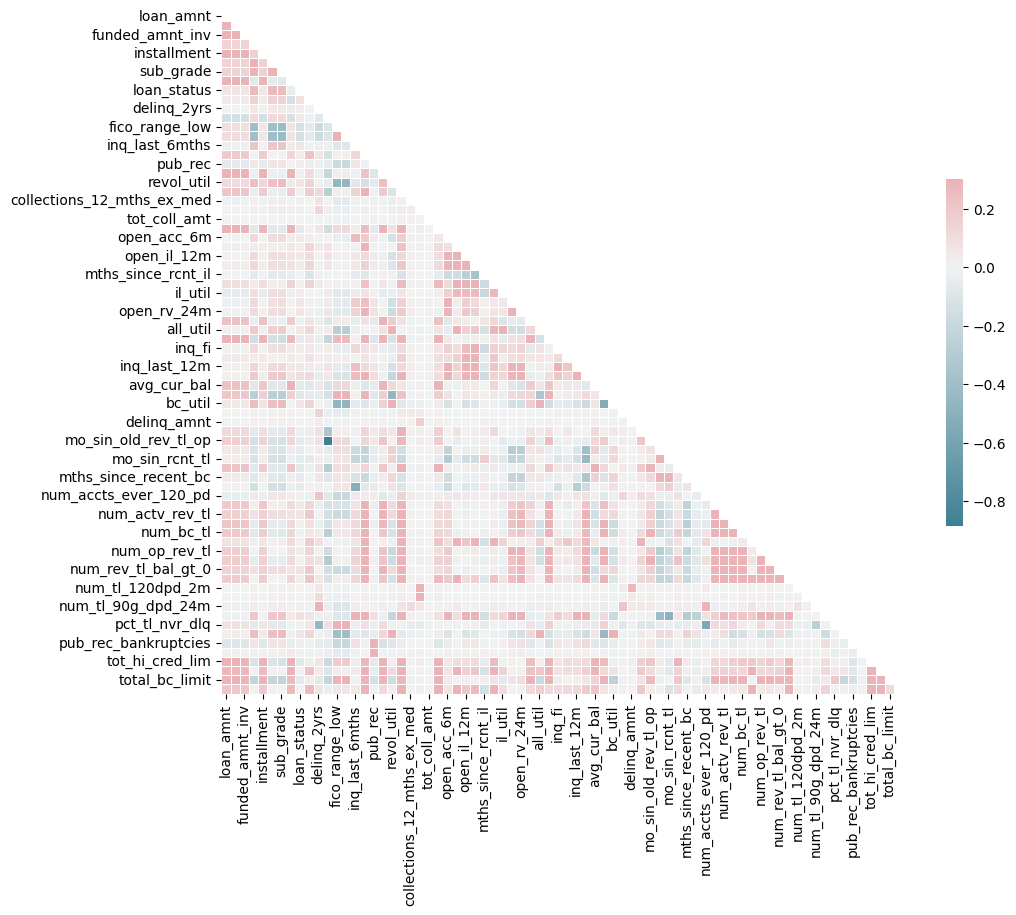

In [117]:
from src import algebra
from src import visualize

corr = algebra.correlation_matrix(df)

visualize.correlation_matrix(corr)

### Drop highly correlated feature pairs

In [118]:
from src.feature_engineering import drop_high_corr

df = drop_high_corr(df, corr)

### Add new features

In [119]:
from src.feature_engineering import frequency_encoding, new_features

df = frequency_encoding(df)
df = new_features(df)

/Users/brendan/repos/brendancsmith/credit-risk-modeling/src/feature_engineering.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length'].fillna(0, inplace=True)


### Scale feature values

In [120]:
# print the first row as a column, don't truncate
from typing import cast
import pandas as pd


# with pd.option_context('display.max_rows', None):
#     display(df.iloc[1])

# print dtype of columns
with pd.option_context('display.max_rows', None):
    display(df.dtypes)

# with pd.option_context('display.max_columns', None):
#     display(df[0])

installment                            float64
sub_grade                                int64
emp_length                             float64
annual_inc                             float64
loan_status                              int64
zip_code                               float64
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                       float64
fico_range_high                        float64
inq_last_6mths                         float64
pub_rec                                float64
total_acc                              float64
collections_12_mths_ex_med             float64
acc_now_delinq                         float64
tot_coll_amt                           float64
open_acc_6m                            float64
open_act_il                            float64
open_il_12m                            float64
open_il_24m                            float64
mths_since_rcnt_il                     float64
total_bal_il 

In [121]:
from src.feature_engineering import scale_features

df = scale_features(df)

### Take another peak

In [122]:
display(df.head())

,installment,sub_grade,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_high,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,state_default_rate
0,-1.204714,0.357684,1.039229,-0.303863,0,-1.041509,-1.108774,-0.361951,0.579588,-0.665092,...,False,False,False,False,True,False,True,False,False,0.412824
1,1.461538,-0.107444,1.039229,-0.160851,0,0.196714,-0.199174,0.777024,0.097830,0.590686,...,False,True,False,False,True,False,True,False,False,0.676720
2,-0.020703,-0.417530,1.039229,-0.189453,0,0.286301,-0.672345,-0.361951,0.185619,-0.037203,...,False,False,False,False,False,True,True,False,False,-0.927422
4,-0.566572,2.218198,-0.917212,0.403088,0,-1.092701,0.635148,0.777024,-0.099334,-0.037203,...,False,False,False,False,False,True,False,True,False,0.412824
5,-0.125785,0.202641,-0.637720,-0.604188,0,-0.689559,-0.724322,-0.361951,-1.501074,-0.194175,...,False,False,False,False,True,False,False,True,False,-0.780594


## Training

### Handle data imbalance

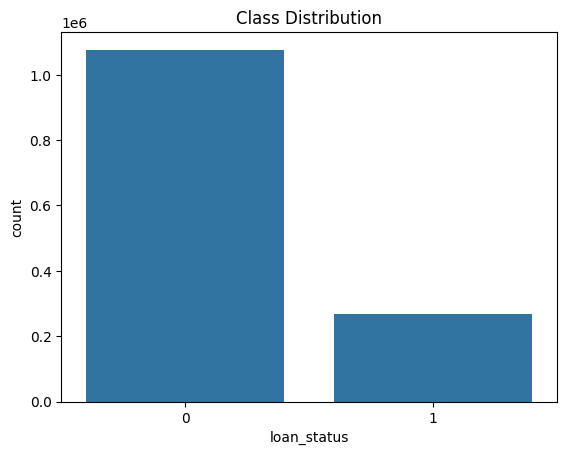

In [123]:
visualize.class_dist(df)

In [124]:
from src import training

X_resampled, y_resampled = training.resample(df)

### Split the data

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

### Train the model

In [126]:
from src.model import create_model

model = create_model(eval_metric='logloss')

model.fit(X_train, y_train)

/Users/brendan/.pyenv/versions/3.12.0/envs/credit-risk/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:49:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Inference
### Make predictions

In [127]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

## Evaluation

### Accuracy

In [128]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8774


### Classification Report

In [129]:
# Classification report
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89    215032
           1       0.97      0.78      0.86    215682

    accuracy                           0.88    430714
   macro avg       0.89      0.88      0.88    430714
weighted avg       0.89      0.88      0.88    430714



### Confusion Matrix

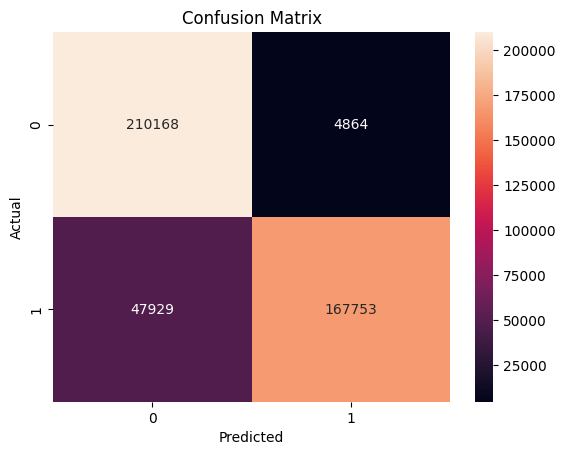

In [130]:
# Confusion matrix
visualize.confusion_matrix(y_test, y_pred)

### ROC Curve

ROC-AUC Score: 0.9323


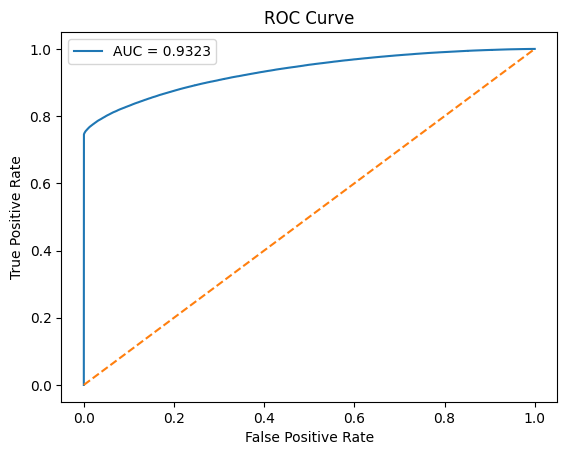

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
visualize.roc_curve(y_test, y_proba, roc_auc)

## Feature importance

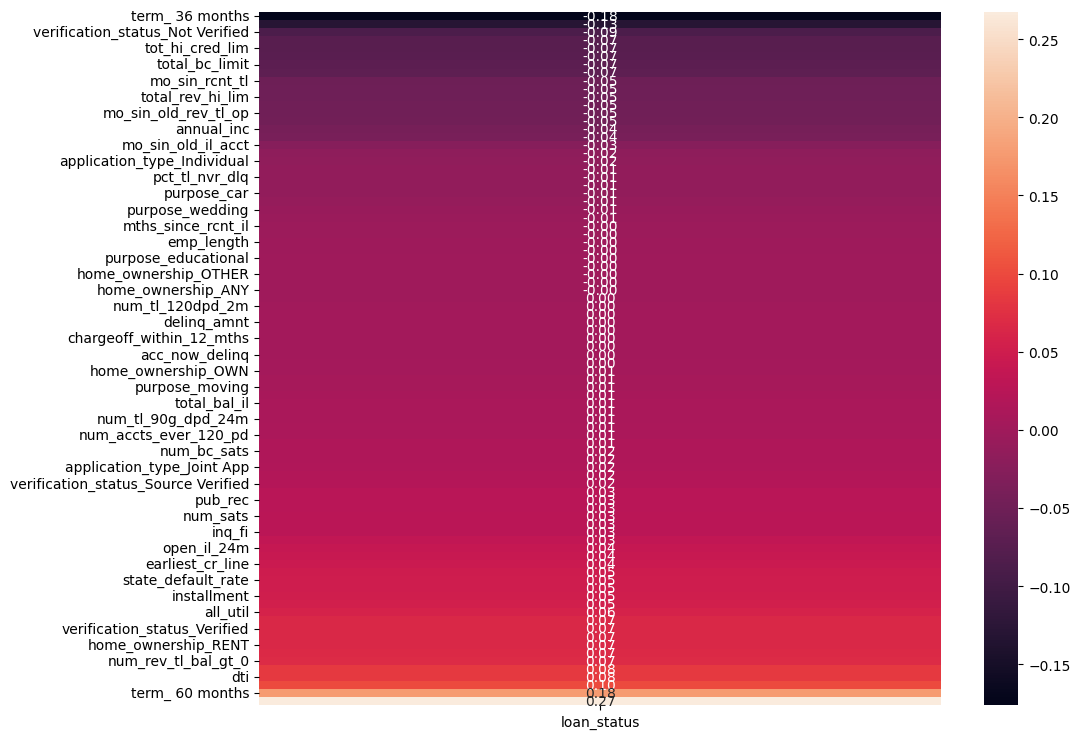

In [140]:
# calculate correlations between the features and the target variable
correlations = df.corr()['loan_status'].sort_values().to_frame()

# plot the correlations
visualize.correlations(correlations.drop('loan_status'))

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(model, X_train, y_train, n_repeats=3, random_state=42)

# Get importance values
importances = result['importances_mean']

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Display the feature importances DataFrame
with pd.option_context('display.max_rows', None):
    display(feature_importances)


,Feature,Importance
81,term_ 60 months,1.094436e-01
84,verification_status_Verified,7.794102e-02
83,verification_status_Source Verified,7.713132e-02
82,verification_status_Not Verified,6.559078e-02
68,purpose_debt_consolidation,6.335631e-02
65,home_ownership_RENT,5.193147e-02
80,term_ 36 months,4.154695e-02
61,home_ownership_MORTGAGE,3.923703e-02
67,purpose_credit_card,3.783780e-02
1,sub_grade,3.236413e-02


## Hyperparameter Tuning

### Grid search

In [134]:
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 0.9],
}

In [142]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

grid_search = GridSearchCV(
    estimator=create_model(eval_metric='logloss'),
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    verbose=1,
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

### Best Model

In [144]:
print("Best Parameters:", grid_search.best_params_)
print(f"Best ROC-AUC Score: {grid_search.best_score_:.4f}")

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best ROC-AUC Score: 0.9325


### Retrain with these hyperparameters

In [145]:
best_params = grid_search.best_params_
model_best = create_model(**best_params)
model_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Evaluate the optimized model

In [146]:
# Predict on test data
y_pred_best = model_best.predict(X_test)
y_proba_best = model_best.predict_proba(X_test)[:,1]

# Accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Accuracy: {accuracy_best:.4f}")

print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.8785
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89    215032
           1       0.97      0.78      0.87    215682

    accuracy                           0.88    430714
   macro avg       0.89      0.88      0.88    430714
weighted avg       0.89      0.88      0.88    430714



Optimized ROC-AUC Score: 0.9323


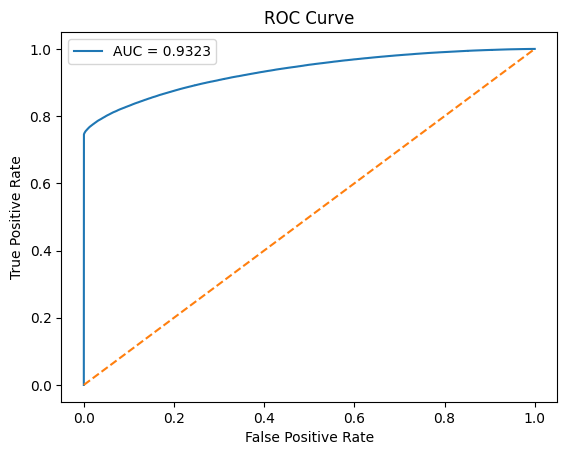

In [147]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Optimized ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
visualize.roc_curve(y_test, y_proba, roc_auc)